# The Switching Clutch Model


$$\quad\quad J_1\dot{\omega_1} = \tau_1$$
$$\quad\quad J_2\dot{\omega_2} = \tau_2$$

If $\lambda = 0$
$$\quad\quad\omega_1 -\omega_2 = 0$$
$$\quad\quad\tau_1 + \tau_2 = 0 $$
   
If $\lambda = 1$
$$\quad\quad\tau_1 = 0$$
$$\quad\quad\tau_2 = 0$$

with $\lambda$ the switching variable modelling the pedal position.

In particular, we will denote $c$ a clock variable such that $\lambda$ switch if $c$ is either positive or negative.

Additionally, we will write $\tau = \tau_1$ such that
$$J_1\dot{\omega_1} = \tau$$
$$J_2\dot{\omega_2} = -\tau$$

and

If $\lambda = 0$ then $\omega_1 -\omega_2 = 0$
   
If $\lambda = 1$ then $\tau = 0$

## Engaging Clutch

Let now consider the case where the cluch is engaged at some time $t_1$. In particular we want to simulate the model:

$$
\begin{align}
\dot{c}   =& -1 \\
\dot{w_1} =& \frac{\tau}{J_1} \\
\dot{w_2} =& \frac{-\tau}{J_2} 
\end{align}
$$

$$
0 = \left\{\begin{align}
     \tau\,,\text{ if } \lambda = 0 \\
     \omega_1-\omega_2\,,\text{ if } \lambda = 1
     \end{align}\right.
$$

ONe can note that the system switch from a differentiation index 0 when $\lambda=0$ to a differentiation index 1 when $\lambda = 1$. 
In this simulation we define the relaxation of this switching constraint by :

$$0 = \lambda\tau + (1-\lambda)(\omega_1-\omega_2)\,, \lambda\in[0,1]$$

Below the plot of the sets:
$$\text{constraint}_1 = \{(\tau,\Delta\omega=(\omega_1-\omega_2),\lambda)\in\mathbb{R}^3 | \lambda=1\text{ and }\tau=0\} $$

$$\text{constraint}_2 = \{(\tau,\Delta\omega,\lambda)\in\mathbb{R}^3 | \lambda=0\text{ and }\Delta\omega=0\} $$

$$\text{relax_constraints} = \{(\tau,\Delta\omega,\lambda)\in\mathbb{R}^3 | \lambda\tau + (1-\lambda)\Delta\omega = 0\} $$

Note the non-convex shape of the relaxation (better plot using implicit equation $zx+(1-z)y$ in http://matkcy.github.io/MA1104-implicitplot.html for implicit surface ...)

<IPython.core.display.Javascript object>


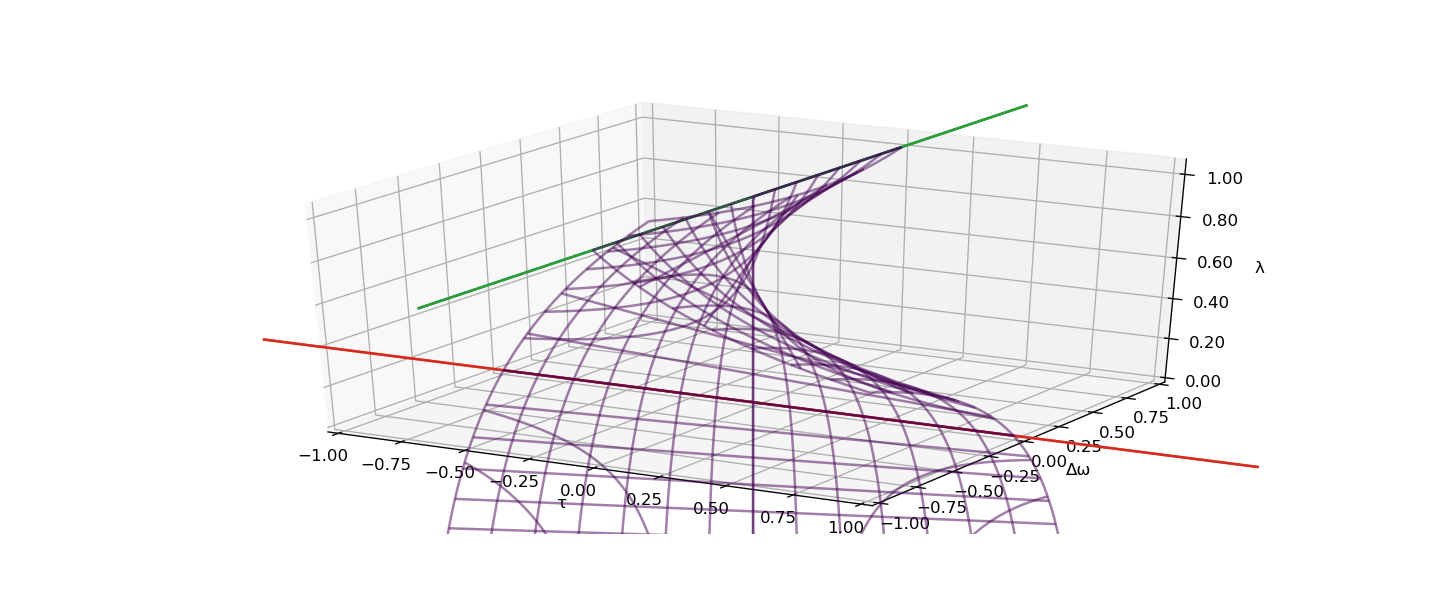

In [12]:
import numpy as np
from numpy import eye, empty, float64, zeros, transpose, array
from siconos.kernel import FirstOrderLinearTIDS, FirstOrderType2R, FirstOrderLinearTIR, EqualityConditionNSL, RelayNSL,\
                           ComplementarityConditionNSL, NonSmoothDynamicalSystem, Interaction, \
                           EulerMoreauOSI, MoreauJeanOSI, LCP, TimeDiscretisation, TimeStepping 
import ipympl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#%matplotlib inline #(picture)
%matplotlib notebook
#%matplotlib widget

# Make data.
c1Δω = np.arange(-2, 2, 0.1)
c1τ  = np.zeros(np.shape(c1Δω))
c1λ  = np.zeros(np.shape(c1Δω)) + 1 


c2τ  = np.arange(-2, 2, 0.1)
c2Δω = np.zeros(np.shape(c2τ))
c2λ  = np.zeros(np.shape(c2τ))


fig = plt.figure(figsize=(12,5))
ax = fig.gca(projection='3d')
# Plot the surface.
ax.plot3D(c1τ, c1Δω, c1λ)
ax.plot3D(c2τ, c2Δω, c2λ)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlabel('τ')
ax.set_ylabel('Δω')
ax.set_zlabel('λ')
# Customize the zoom
ax.set_zlim(0., 1.05)
ax.set_xlim(-10., 10)
ax.set_ylim(-10., 10)
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

def plot_implicit(fn, bbox=(-1,1),fig=None):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    if fig==None:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_zlim3d(zmin,zmax)
        ax.set_xlim3d(xmin,xmax)
        ax.set_ylim3d(ymin,ymax)
    else:
        ax = fig.gca(projection='3d')
        ax.set_zlim3d(zmin,zmax)
        ax.set_xlim3d(xmin,xmax)
        ax.set_ylim3d(ymin,ymax)
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',alpha=0.5)
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',alpha=0.5)

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',alpha=0.5)

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    

    plt.show()
    
def relaxation(x,y,z):
    return z*x + (1-z)*y

plot_implicit(relaxation,fig=fig)  

ax.plot3D(c1τ, c1Δω, c1λ)
ax.plot3D(c2τ, c2Δω, c2λ)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlabel('τ')
ax.set_ylabel('Δω')
ax.set_zlabel('λ')
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_zlim(0., 1.05)
ax.set_xlim(-1., 1)
ax.set_ylim(-1., 1)

plt.show()



We now study the relaxed model:
$$
\left\{
\begin{align}
\dot{c}   =& -1 \\
\dot{w_1} =& \frac{\tau}{J_1} \\
\dot{w_2} =& \frac{-\tau}{J_2} \\
0 =& \lambda\tau + (1-\lambda)(\omega_1 - \omega_2)
\end{align}\right.
$$

and $\lambda$ given by $\lambda \in\texttt{Relay}_{[0,1]}(-c)$

$$
\lambda \in 
\left\{
\begin{align}
\{0\}&\,,\text{ if }c\in \mathbb{R}^+ \\
[0,1]&\,,\text{ if }c= 0\\
\{1\}&\,,\text{ if }c\in\mathbb{R}^-
\end{align}\right.
$$

Assuming $c(0) = t_1$ this models a clutch en free mode for $t\in[0,t_1]$, and engaging at $t=t_1$.

Let now write the backward euler discretization of this model. Let first note $\mathbf{x} = (c,\omega_1,\omega_2,\tau)$, the system can be re-written as:


$$
\left\{
\begin{align}
E\dot{\mathbf{x}} =& A\mathbf{x} + b + F(\mathbf{x},\lambda) \\
\lambda \in& \texttt{ Relay}_{[0,1]}(Cx)
\end{align}\right.
$$
with 
$$E = \begin{pmatrix}\mathbb{I}_3 & 0 \\ 0 & 0 \end{pmatrix}
\,,\quad A =  \begin{pmatrix}0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \frac{1}{J_1} \\ 0 & 0 & 0 & \frac{-1}{J_2} \\ 0 & 1 & -1 & 0  \end{pmatrix}
\,,\quad b = \begin{pmatrix} -1\\ \frac{T_1}{J_1}\\ \frac{T_2}{J_2}\\ 0 \end{pmatrix}
\,,\quad F(\mathbf{x},\lambda) = \begin{pmatrix} 0_{3,1} \\ \lambda(\tau -\omega_1 + \omega_2) \end{pmatrix}
\,,\quad C^\text{T}=\begin{pmatrix} -1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

The backward euler time-discretization is then 

$$
\left\{
\begin{align}
E(\mathbf{x}_{k+1}-\mathbf{x}_{k}) =& hA\mathbf{x}_{k+1} + hb + hF(\mathbf{x}_{k+1},\lambda_{k+1}) \\
\lambda_{k+1} \in& \texttt{ Relay}_{[0,1]}(C\mathbf{x}_{k+1}) \\
&\mathbf{x}_0 = \mathbf{x}(0)\,, \lambda_0 = 0
\end{align}\right.
$$

Let note $\mathcal{R}(\mathbf{x},\lambda) = (E-hA)\mathbf{x} - (E\mathbf{x}_{k}+ hb) - hF(\mathbf{x},\lambda)$ the residual at step $k$, such that at each time step $k+1$ we are searching to solve the non-linear system:

$$\left\{\begin{align}
\mathcal{R}(\mathbf{x}_{k+1},\lambda_{k+1}) &= 0 \\
\mathbf{y}_{k+1} &= C\mathbf{x}_{k+1} \\
-\mathbf{y}_{k+1} &\in N_{[0,1]}(\lambda_{k+1})
\end{align}\right.
$$

To solve the $\mathcal{R}(\mathbf{x}_{k+1},\lambda_{k+1}) = 0$ non-linear systems we use a Newton linearization $\mathcal{R}_L$ of $\mathcal{R}$ given by:

$$
\left\{\begin{align}
\mathcal{R}_L(\mathbf{x}^{\alpha+1},\lambda^{\alpha+1}) &= \mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) + M(\lambda^{\alpha})(\mathbf{x}^{\alpha+1}-\mathbf{x}^{\alpha}) + B(\mathbf{x}^{\alpha})(\lambda^{\alpha+1}-\lambda^{\alpha}) \\
& \mathbf{x}^{0} = \mathbf{x}_k, \lambda^0 = \lambda_k
\end{align}\right.,
$$
(notations are simplified using $\mathbf{x}^{\alpha+1}$ instead of $\mathbf{x}_{k+1}^{\alpha+1}$ and simlilarly for $\lambda_{k+1}^{\alpha+1}$ )

where 
$$
\left\{\begin{align}
M(\lambda^{\alpha}) & = \nabla_{\mathbf{x}}\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) 
= E-hA - h\nabla_{x}F(\mathbf{x}^{\alpha},\lambda^{\alpha}) =  \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & \frac{-h}{J_1} \\ 0 & 0 & 1 & \frac{h}{J_2} \\   0 & h(1+\lambda^{\alpha}) & -h(1+\lambda^{\alpha}) & -h\lambda^{\alpha}  \end{pmatrix} \\
B(\mathbf{x}^{\alpha})& = \nabla_{\lambda}\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) = - h\nabla_{\lambda}F(\mathbf{x}^{\alpha},\lambda^{\alpha}) =\begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\   0 & h & -h & -h \end{pmatrix}\mathbf{x}^{\alpha}
\end{align}\right.
$$

When $\lambda^{\alpha} \neq -h$ we can write:

$$\mathbf{x}^{\alpha+1} = -M(\lambda^{\alpha})^{-1} \left( \mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) + B(\mathbf{x}^{\alpha})(\lambda^{\alpha+1}-\lambda^{\alpha}) \right) + \mathbf{x}^{\alpha} $$

leading to 

$$
\left\{\begin{align}
\mathbf{y}^{\alpha+1} &= CM(\lambda^{\alpha})^{-1} \left(  B(\mathbf{x}^{\alpha})(\lambda^{\alpha}-\lambda^{\alpha+1}) -\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) \right) + C\mathbf{x}^{\alpha}\\
-\mathbf{y}^{\alpha+1} &\in N_{[0,1]}(\lambda^{\alpha+1})
\end{align}\right.
$$

simplified into 
$$
\left\{\begin{align}
\mathbf{y}^{\alpha+1} &= W^{\alpha+1}\lambda^{\alpha+1} + q^{\alpha+1}\\
-\mathbf{y}^{\alpha+1} &\in N_{[0,1]}(\lambda^{\alpha+1})
\end{align}\right.,
$$

with 
$$
\left\{\begin{align}
W^{\alpha+1} &= -CM(\lambda^{\alpha})^{-1}B(\mathbf{x}^{\alpha})\\
q^{\alpha+1} &= CM(\lambda^{\alpha})^{-1} \left( B(\mathbf{x}^{\alpha})\lambda^{\alpha}-\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) \right) + C\mathbf{x}^{\alpha}
\end{align}\right.
$$

When unique solution ?


In [2]:
import scipy.linalg as linalg
import numpy as np
import siconos.kernel as sk
from numpy import eye, empty, float64, zeros, transpose, array
from siconos.kernel import FirstOrderLinearTIDS, FirstOrderType2R, FirstOrderLinearTIR, EqualityConditionNSL, RelayNSL,\
                           ComplementarityConditionNSL, NonSmoothDynamicalSystem, Interaction, \
                           EulerMoreauOSI, MoreauJeanOSI, LCP, TimeDiscretisation, TimeStepping 
import siconos.numerics as sn
#import cvxopt 
#from cvxopt import matrix

# Initial conditions
t0   = 0       # start time
t1   = 5       # switch time 
T    = 20      # end time

ω10  = 10     # initial rotation speed for disk 1 (Motor) -- free mode
ω20  = 5      # initial rotation speed for disk 2 (Clutch) --free mode

J1   = 1       # Inertia matrix disk 1
J2   = 1/4     # Inertia matrix disk 2 (smaller by half ?)

T1 = 10       # when no contact motor rpm = constant, no torque  -- free mode
T2 = -10       # when no contact small constant decrease          -- free mode

τ0   = 0.5


# right constraint
_C = [1,-1]

# "Reset direction": torque at contact
_B  = [1/J1,-1/J2]

# Constraint on torque
_D = [1]

_A = zeros((4,4));

_A[1,3] = _B[0]; _A[2,3] = _B[1];    # variable τ on ω1 and ω2               
_A[3,1] = _C[0]; _A[3,2] = _C[1]     # algebraic constraint 0 = λ(Dτ) + (1-λ)(Cω) 

print("A = ")
print(_A)

_b = [-1, T1/J1, T2/J2, 0] 
print("b = ")
print(_b)

_E = np.eye(4)
_E[3,3] = 0
print("E = ")
print(_E)

# Linear ODE system with time invariant coefficients
dyn = FirstOrderLinearTIDS([t1,ω10,ω20,τ0],_A)
dyn.setbPtr(_b)
dyn.setMPtr(_E)

clutch_DAE = NonSmoothDynamicalSystem(t0, T)
clutch_DAE.insertDynamicalSystem(dyn)

##################################################################
#     DECLARATION OF The relation and feedback in the Derivatives
#################################################################

# NonLinear-relation wich inherit FirstOrderNonLinearR
# DO NOT FORGET ComputeResiduR and Y when creating TimeStepping pb
class MyNLRelation_SwitchingDAEClutch(sk.FirstOrderNonLinearR):
    
    
    ## Constructeur __init__
    def __init__(self):
        sk.FirstOrderNonLinearR.__init__(self)
        
        return
    
    ### h related functions
    # Note that if C is fixed using self.setCPtr() then the output is considered linear
    # and the Jacobian related functions are not used anymore. Same with g.
    # (See sources of computeJach() function ) 
    def computeh(self, time, x, λ, z, y):
        y[:] = zeros(1)
        y[0] = -x[0]; # λ = 0 if x<=0, 1 if x>=0
        pass

    def computeJachlambda(self, time, x, λ, z, D):
        D[:] = zeros((1,1))
        pass
        
    def computeJachx(self, time, x, λ, z, C): 
        C[:] = zeros((1,4))
        C[0,0] = -1 

        pass   
    
    ### g related functions
    def computeg(self, time, x, λ, z, r):      
        r[:] = zeros(4)
        r[3] = λ[0]*(_D[0]*x[3] - _C[0]*x[1]- _C[1]*x[2])
        pass
    
    def computeJacgx(self, time, x, λ, z, K):     
        K[:] = zeros((4,4))
        K[3,1] = -λ[0]*_C[0] 
        K[3,2] = -λ[0]*_C[1]
        K[3,3] =  λ[0]*_D[0]
        
        pass
    
    def computeJacglambda(self, time, x, λ, z, B): 
        B[:] = zeros((4,1))
        B[3,0] = (- _C[0]*x[1] - _C[1]*x[2] + _D[0]*x[3]  ) 
        pass


### Python Non-linear Relation    
rel_python_1 = MyNLRelation_SwitchingDAEClutch() 
# Declaration that right side is an LCP
nslaw1 = sk.RelayNSL(1,0.,1.)

# Link between left hand side et right hand side of the LCP
# 0=< C1*x + D1*λ + e1 _|_ λ>= 0
interaction_1 = Interaction(nslaw1, rel_python_1)

##########################################################

clutch_DAE.link(interaction_1, dyn)

# Discretization and non-smooth problem formulation (LCP)
θ = 1.
γ = 1.
#osi = EulerMoreauOSI(θ)  # One Step time Integrator for First Order Dynamical Systems.
# Simple theta method (~backward euler)
osi = EulerMoreauOSI(θ,γ)  # One Step time Integrator for First Order Dynamical Systems.

osnspb = sk.Relay()

#osnspb.setNumericsVerboseMode(True)

# Simulation and time discretisation
time_step =  0.05
td = TimeDiscretisation(t0, time_step)
simu = TimeStepping(clutch_DAE, td, osi, osnspb)

##########################################################################
## !!! ALWAYS DECLARE COMPUTE RESIDUY and R for NonLinear Relations !!!!
##         OTHERWISE NEWTOWN ALG DO NOT USE JACOBIANS 
#########################################################################
simu.setComputeResiduY(True)
simu.setComputeResiduR(True)
simu.setNewtonMaxIteration(100)
simu.setNewtonTolerance(1e-10)
##########################################################################


##### Simulation run
x = dyn.x() # tracking state variables form ODE
λ = interaction_1.lambda_(0) # tracking λ variables form LCP
k = 0

##### Numpy array used to save data at each time step, for post-processing
N = int((T - t0) / simu.timeStep()) + 1
data_plot = zeros((N, 6))

###### Initial state
data_plot[k, 0] = t0
data_plot[k, 1] = x[0] # d
data_plot[k, 2] = x[1] # ω1
data_plot[k, 3] = x[2] # ω2
data_plot[k, 4] = x[3] # τ
data_plot[k, 5] = λ[0] # λ
k += 1

while simu.hasNextEvent():
    simu.computeOneStep() # Build and solve the LCP    
    osnspb.display()
    data_plot[k, 0] = simu.nextTime()
    data_plot[k, 1] = x[0] # d
    data_plot[k, 2] = x[1] # ω1
    data_plot[k, 3] = x[2] # ω2
    data_plot[k, 4] = x[3] # τ 
    data_plot[k, 5] = λ[0] # λ
    k += 1 
    #rel_python.display()
    simu.nextStep() # Save current state and prepare next step

#osnspb.display()
#np.linalg.eigvals(_M)

A = 
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0. -4.]
 [ 0.  1. -1.  0.]]
b = 
[-1, 10.0, -40.0, 0]
E = 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


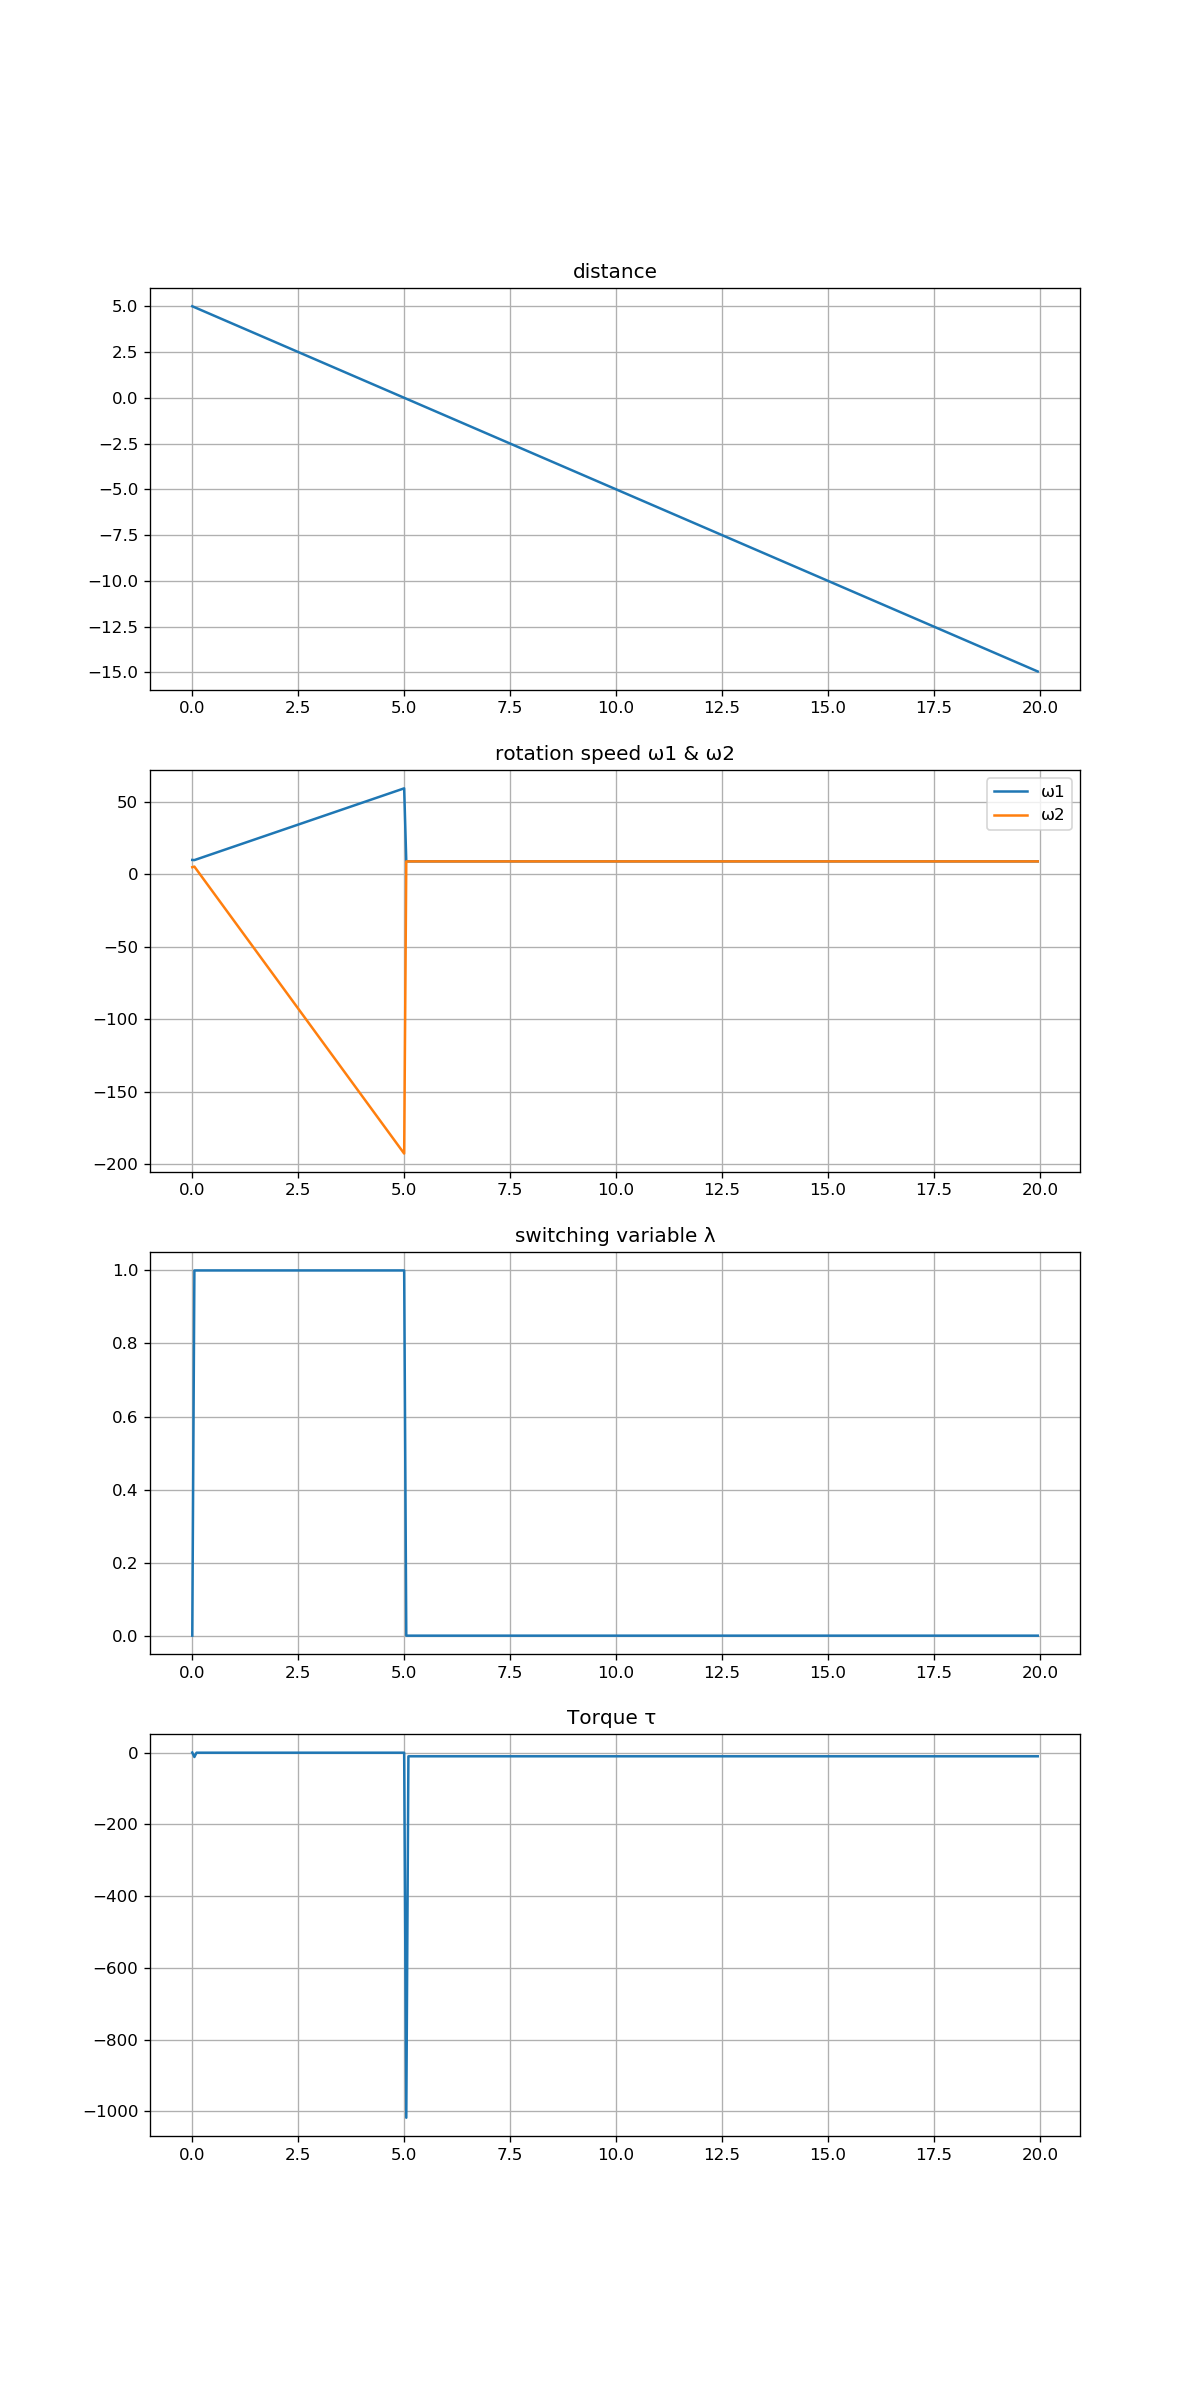

<IPython.core.display.Javascript object>


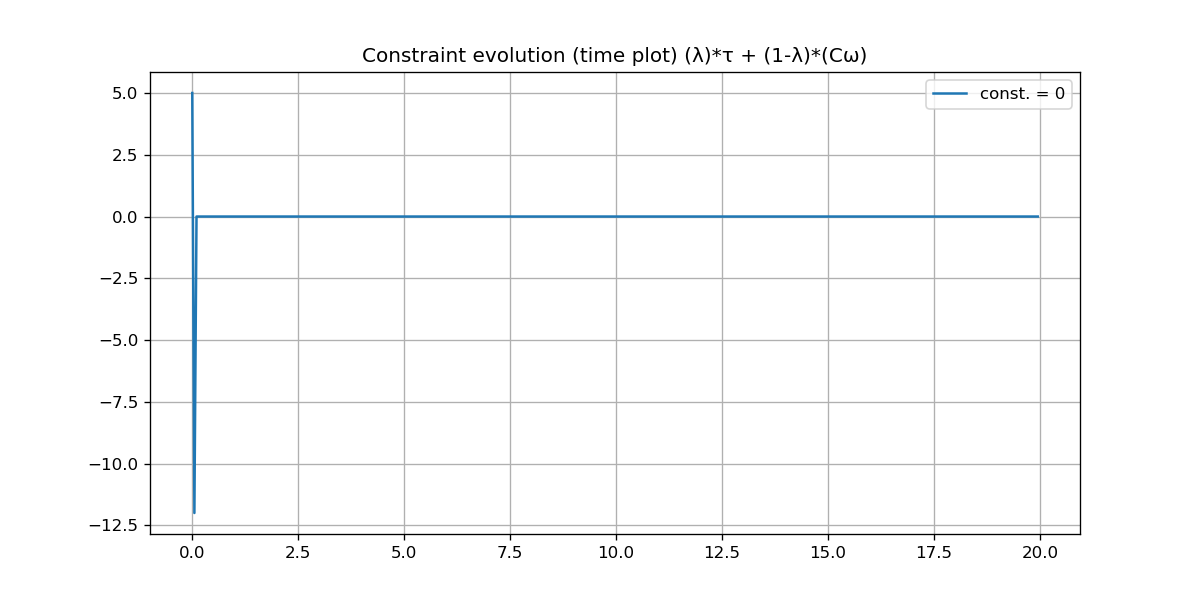

In [11]:
# Plotting
import ipympl
import matplotlib.pyplot as plt
%matplotlib notebook

# plt.figure(figsize=(10,5))
# plt.title('Variables (state space plot)')
# plt.plot(data_plot[0:k - 1, 2], data_plot[0:k - 1, 3],label='ω2(ω1)')
# plt.legend()
# plt.grid()
# plt.show()
# plt.figure(figsize=(10,5))
# plt.title('Variables (time plot)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 1],label='d(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 2],label='ω1(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 3],label='ω2(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 4],label='τ(t)')
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(10,5))
# plt.title('λ variables (time plot)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 5],label='λ')
# plt.legend()
# plt.grid()
# plt.show()

plt.figure(figsize=(10,20))
plt.subplot(411)
plt.title('distance')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 1])
plt.grid()
plt.subplot(412)
plt.title('rotation speed ω1 & ω2')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 2],label='ω1')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 3],label='ω2')
plt.legend()
plt.grid()
plt.subplot(413)
plt.title('switching variable λ')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 5])
plt.grid()
plt.subplot(414)
plt.title('Torque τ ')
plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 4])
plt.grid()
plt.show()


constraint = data_plot[0:k - 1, 5]*(data_plot[0:k - 1, 4]) + (1-data_plot[0:k - 1, 5])*(_C[0]*data_plot[0:k - 1, 2]+_C[1]*data_plot[0:k - 1, 3])
plt.figure(figsize=(10,5))
plt.title('Constraint evolution (time plot) (λ)*τ + (1-λ)*(Cω)')
plt.plot(data_plot[0:k - 1, 0], constraint,label='const. = 0')
plt.legend()
plt.grid()
plt.show()



Below the plot of the graph:
$$
\left\{\begin{align}
\mathbf{y}_{k+1} &= W\lambda_{k+1} + q\\
-\mathbf{y}_{k+1} &\in N_{[0,1]}(\lambda_{k+1})
\end{align}\right.,
$$
at each time step. Unicity can be empirically checked as we have a unique intersection.

The backward euler time-discretization is then 

$$
\left\{
\begin{align}
E(\mathbf{x}_{k+1}-\mathbf{x}_{k}) =& hA\mathbf{x}_{k+1} + hb + F(\mathbf{x}_{k+1},\lambda_{k+1}) \\
\lambda_{k+1} \in& \texttt{ Relay}_{[0,1]}(C\mathbf{x}_{k+1}) \\
&\mathbf{x}_0 = \mathbf{x}(0)\,, \lambda_0 = 0
\end{align}\right.
$$

Let note $\mathcal{R}(\mathbf{x},\lambda) = (E-hA)\mathbf{x} - (E\mathbf{x}_{k}+ hb) - hF(\mathbf{x},\lambda)$ the residual at step $k$, such that at each time step $k+1$ we are searching to solve the non-linear system:

$$\left\{\begin{align}
\mathcal{R}(\mathbf{x}_{k+1},\lambda_{k+1}) &= 0 \\
\mathbf{y}_{k+1} &= C\mathbf{x}_{k+1} \\
-\mathbf{y}_{k+1} &\in N_{[0,1]}(\lambda_{k+1})
\end{align}\right.
$$

To solve the $\mathcal{R}(\mathbf{x}_{k+1},\lambda_{k+1}) = 0$ non-linear systems we use a Newton linearization $\mathcal{R}_L$ of $\mathcal{R}$ given by:

$$
\left\{\begin{align}
\mathcal{R}_L(\mathbf{x}^{\alpha+1},\lambda^{\alpha+1}) &= \mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) + M(\lambda^{\alpha})(\mathbf{x}^{\alpha+1}-\mathbf{x}^{\alpha}) + B(\mathbf{x}^{\alpha})(\lambda^{\alpha+1}-\lambda^{\alpha}) \\
& \mathbf{x}^{0} = \mathbf{x}_k, \lambda^0 = \lambda_k
\end{align}\right.,
$$
(notations are simplified using $\mathbf{x}^{\alpha+1}$ instead of $\mathbf{x}_{k+1}^{\alpha+1}$ and simlilarly for $\lambda_{k+1}^{\alpha+1}$ )

where 
$$
\left\{\begin{align}
M(\lambda^{\alpha}) & = \nabla_{\mathbf{x}}\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) 
= E-hA - h\nabla_{x}F(\mathbf{x}^{\alpha},\lambda^{\alpha}) =  \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & \frac{-h}{J_1} \\ 0 & 0 & 1 & \frac{h}{J_2} \\   0 & h(1+\lambda^{\alpha}) & -h(1+\lambda^{\alpha}) & -h\lambda^{\alpha}  \end{pmatrix} \\
B(\mathbf{x}^{\alpha})& = \nabla_{\lambda}\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) = - h\nabla_{\lambda}F(\mathbf{x}^{\alpha},\lambda^{\alpha}) =\begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\   0 & h & -h & -h \end{pmatrix}\mathbf{x}^{\alpha}
\end{align}\right.
$$

When $\lambda^{\alpha} \neq -h$ we can write:

$$\mathbf{x}^{\alpha+1} = -M(\lambda^{\alpha})^{-1} \left( \mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) + B(\mathbf{x}^{\alpha})(\lambda^{\alpha+1}-\lambda^{\alpha}) \right) + \mathbf{x}^{\alpha} $$

leading to 

$$
\left\{\begin{align}
\mathbf{y}^{\alpha+1} &= CM(\lambda^{\alpha})^{-1} \left(  B(\mathbf{x}^{\alpha})(\lambda^{\alpha}-\lambda^{\alpha+1}) -\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) \right) + C\mathbf{x}^{\alpha}\\
-\mathbf{y}^{\alpha+1} &\in N_{[0,1]}(\lambda^{\alpha+1})
\end{align}\right.
$$

simplified into 
$$
\left\{\begin{align}
\mathbf{y}^{\alpha+1} &= W^{\alpha+1}\lambda^{\alpha+1} + q^{\alpha+1}\\
-\mathbf{y}^{\alpha+1} &\in N_{[0,1]}(\lambda^{\alpha+1})
\end{align}\right.,
$$

with 
$$
\left\{\begin{align}
W^{\alpha+1} &= -CM(\lambda^{\alpha})^{-1}B(\mathbf{x}^{\alpha})\\
q^{\alpha+1} &= CM(\lambda^{\alpha})^{-1} \left( B(\mathbf{x}^{\alpha})\lambda^{\alpha}-\mathcal{R}(\mathbf{x}^{\alpha},\lambda^{\alpha}) \right) + C\mathbf{x}^{\alpha}
\end{align}\right.
$$



In [4]:

import ipympl
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib notebook

h = time_step
# right constraint


def F(λ):
    _F  = np.zeros((4,4));
    _F[3,3] = 0
    #_F[1,3] = -h/J1
    #_F[2,3] = -h/J2
    #_F[3,3] = -h*λ; _F[3,1] = h+h*λ; _F[3,2] = -(h + h*λ);
    _F[3,1] = h*λ; _F[3,2] = -h*λ; _F[3,3] = -h*λ; 
    return _F
    
def B(x):
    _B  = zeros((4,4));
    _B[3,1] = 1; _B[3,2] =-1; _B[3,3] = -1;
    return h*_B.dot(x)
        

def W(k):
    _C = zeros((1,4))
    _C[0,0] = -1; 
    xk = np.array([data_plot[k, 1],data_plot[k, 2],data_plot[k, 3],data_plot[k, 4]])
    λk = data_plot[k, 5]
    _M = _E - h*_A - F(λk)
    #print("##",_E-F(λk),"##")
    _W = -1*_C.dot(np.linalg.pinv(_M)).dot(B(xk))
    return _W

# def q(k):
#     xk = np.array([data_plot[k, 1],data_plot[k, 2],data_plot[k, 3],data_plot[k, 4]])
#     λk = data_plot[k, 5]
#     temp = B(xk)*λk - Resi(xk,λk)
#     -1*_C.dot(np.inv(_M)).dot(temp) + _C.dot(xk)
    

def q(k):
    _C = zeros((1,4))
    _C[0,0] = -1; 
    λk = data_plot[k, 5]
    yk = _C[0,0]*data_plot[k, 1]
    
    return yk-W(k)*λk
    
#print([q(i) for i in range(0,N-1)])

# def plot_nslaw(ite):
#     plt.figure(figsize=(10,5))
#     λk = data_plot[ite, 5]
#     yk = data_plot[ite, 1]
#     if λk!=0:
#         λ_range = np.linspace(-0.1, 1.1, 100)    
#         #y = -(yk/λk)*λ_range + yk   
#         y = -1*W(ite)*λ_range - q(ite)
#     else:
#         y = np.linspace(-10, 10, 100)
#         λ_range = np.tile(0., 100)
        
#     plt.plot(λ_range , y,linewidth=3,color='red',label='y(λ) at step k')
#     nbpts = 20   
#     y_lower = np.linspace(-10, 0, nbpts)
#     λ_lower = np.tile(0, nbpts)
#     y_mid = np.tile(0, nbpts)
#     λ_mid = np.linspace(0, 1, nbpts)
#     y_high = np.linspace(0, 10, nbpts)
#     λ_high = np.tile(1., nbpts)
    
#     plt.plot(λ_high , y_high,linewidth=3,color='blue')
#     plt.plot(λ_mid,y_mid,'b',linewidth=3,color='blue')
#     plt.plot(λ_lower,y_lower,'b',linewidth=3,color='blue',label='Normal cone')
    
#     plt.xlabel("λ")
#     plt.ylabel("y")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.grid(True)
#     plt.show()
       
# interact(plot_nslaw,ite=(0,N-1))


<IPython.core.display.Javascript object>


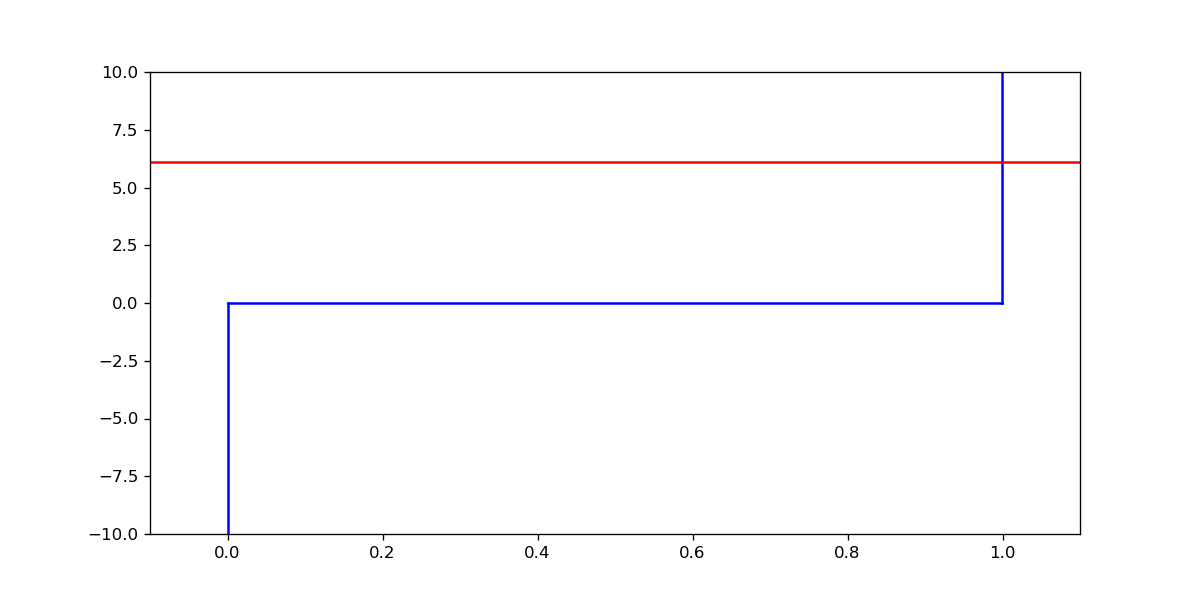

In [10]:
####################################################
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,5))

ax = plt.axes(xlim=(-0.1, 1.1), ylim=(-10, 10))

Nlines = 4
lines = [plt.plot([], [])[0] for _ in range(Nlines)] #lines to animate

patches = lines

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    return patches #return everything that must be updated

def animate(i):
    
    λk = data_plot[i, 5]
    yk = data_plot[i, 1]
#     if λk!=0:
#         λ_range = np.linspace(-0.1, 1.1, 100)    
#         #y = -(yk/λk)*λ_range + yk
#         y = -W(i)*λ_range - q(i) 
#     else:
#         y = np.linspace(-10, 10, 100)
#         λ_range = np.tile(0., 100)

    λ_range = np.linspace(-0.1, 1.1, 100)  
    y = -W(i)*λ_range - q(i) 
        
    nbpts = 20   
    y_lower = np.linspace(-10, 0, nbpts)
    λ_lower = np.tile(0, nbpts)
    y_mid = np.tile(0, nbpts)
    λ_mid = np.linspace(0, 1, nbpts)
    y_high = np.linspace(0, 10, nbpts)
    λ_high = np.tile(1., nbpts)
    
    #animate lines
    for j,line in enumerate(lines):
        if j==0 :
            line.set_data(λ_lower, y_lower)
            line.set_color('blue')
        if j==1 :
            line.set_data(λ_mid, y_mid)
            line.set_color('blue')
        if j==2 :
            line.set_data(λ_high, y_high)
            line.set_color('blue')
        if j==3 :
            line.set_data(λ_range, y)
            line.set_color('red')

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N-1, interval=15, blit=True, repeat=True)

plt.show()

On this first model we can already observe the error on the two first steps: one for the jump of the $\lambda$ variable and one for the consistent initialization of the $\tau$ variable (when the initial condition is inconsistent). 

Note $\textbf{we cannot avoid the inconsistency on}$ $\lambda$ ! This leads to an inconsistancy on $\tau$ at the second time step !
This is even worse in the case of a $(\theta,\gamma)$-method with $\theta$ and $\gamma$ not equal to $1$. 

When $\theta\neq 1$ the stabilization on the algebraic constraint of index 1 ($t>5$) is harder, and cannot be stabilized, however the index 0 (at $t=0$ )system is not/less affected by the prior jump of the $\lambda$ variable. 

When $\gamma \neq 1$ the index 0 (at $t=0$ ) affected by the inconistent initial condition is affect even more by the jump of $\lambda$ at the first step.

These observation are even more visible when the clutch is disengaging: going from index 1 to index 0. 

Another point is that the non-smooth algebraic constraint regularization below, which uses a friction coefficient $\alpha$ to approximate the the algebraic constraint, does not present such numerical problems when $\theta\neq 1$ (see file ``clutch_friction_model.ipnyb``), but does have simliar issues when $\gamma \neq 1$.

$$(\omega_2 - \omega_1) \in N_{[-\alpha, \alpha]}(\tau) = \left\{ 
\begin{align}
\mathbb{R}^-&\,\text{, if  } \tau = -\alpha\lambda \\
0&\,\text{, if  } \tau \in [-\alpha\lambda,\alpha\lambda] \\
\mathbb{R}^+&\,\text{, if  } \tau = \alpha\lambda \\
\end{align}\right.,$$
with $\lambda\in[0,1]$ 

## Disengaging Clutch

A = 
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0. -4.]
 [ 0.  1. -1.  0.]]
b = 
[-1, 10.0, -40.0, 0]
E = 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


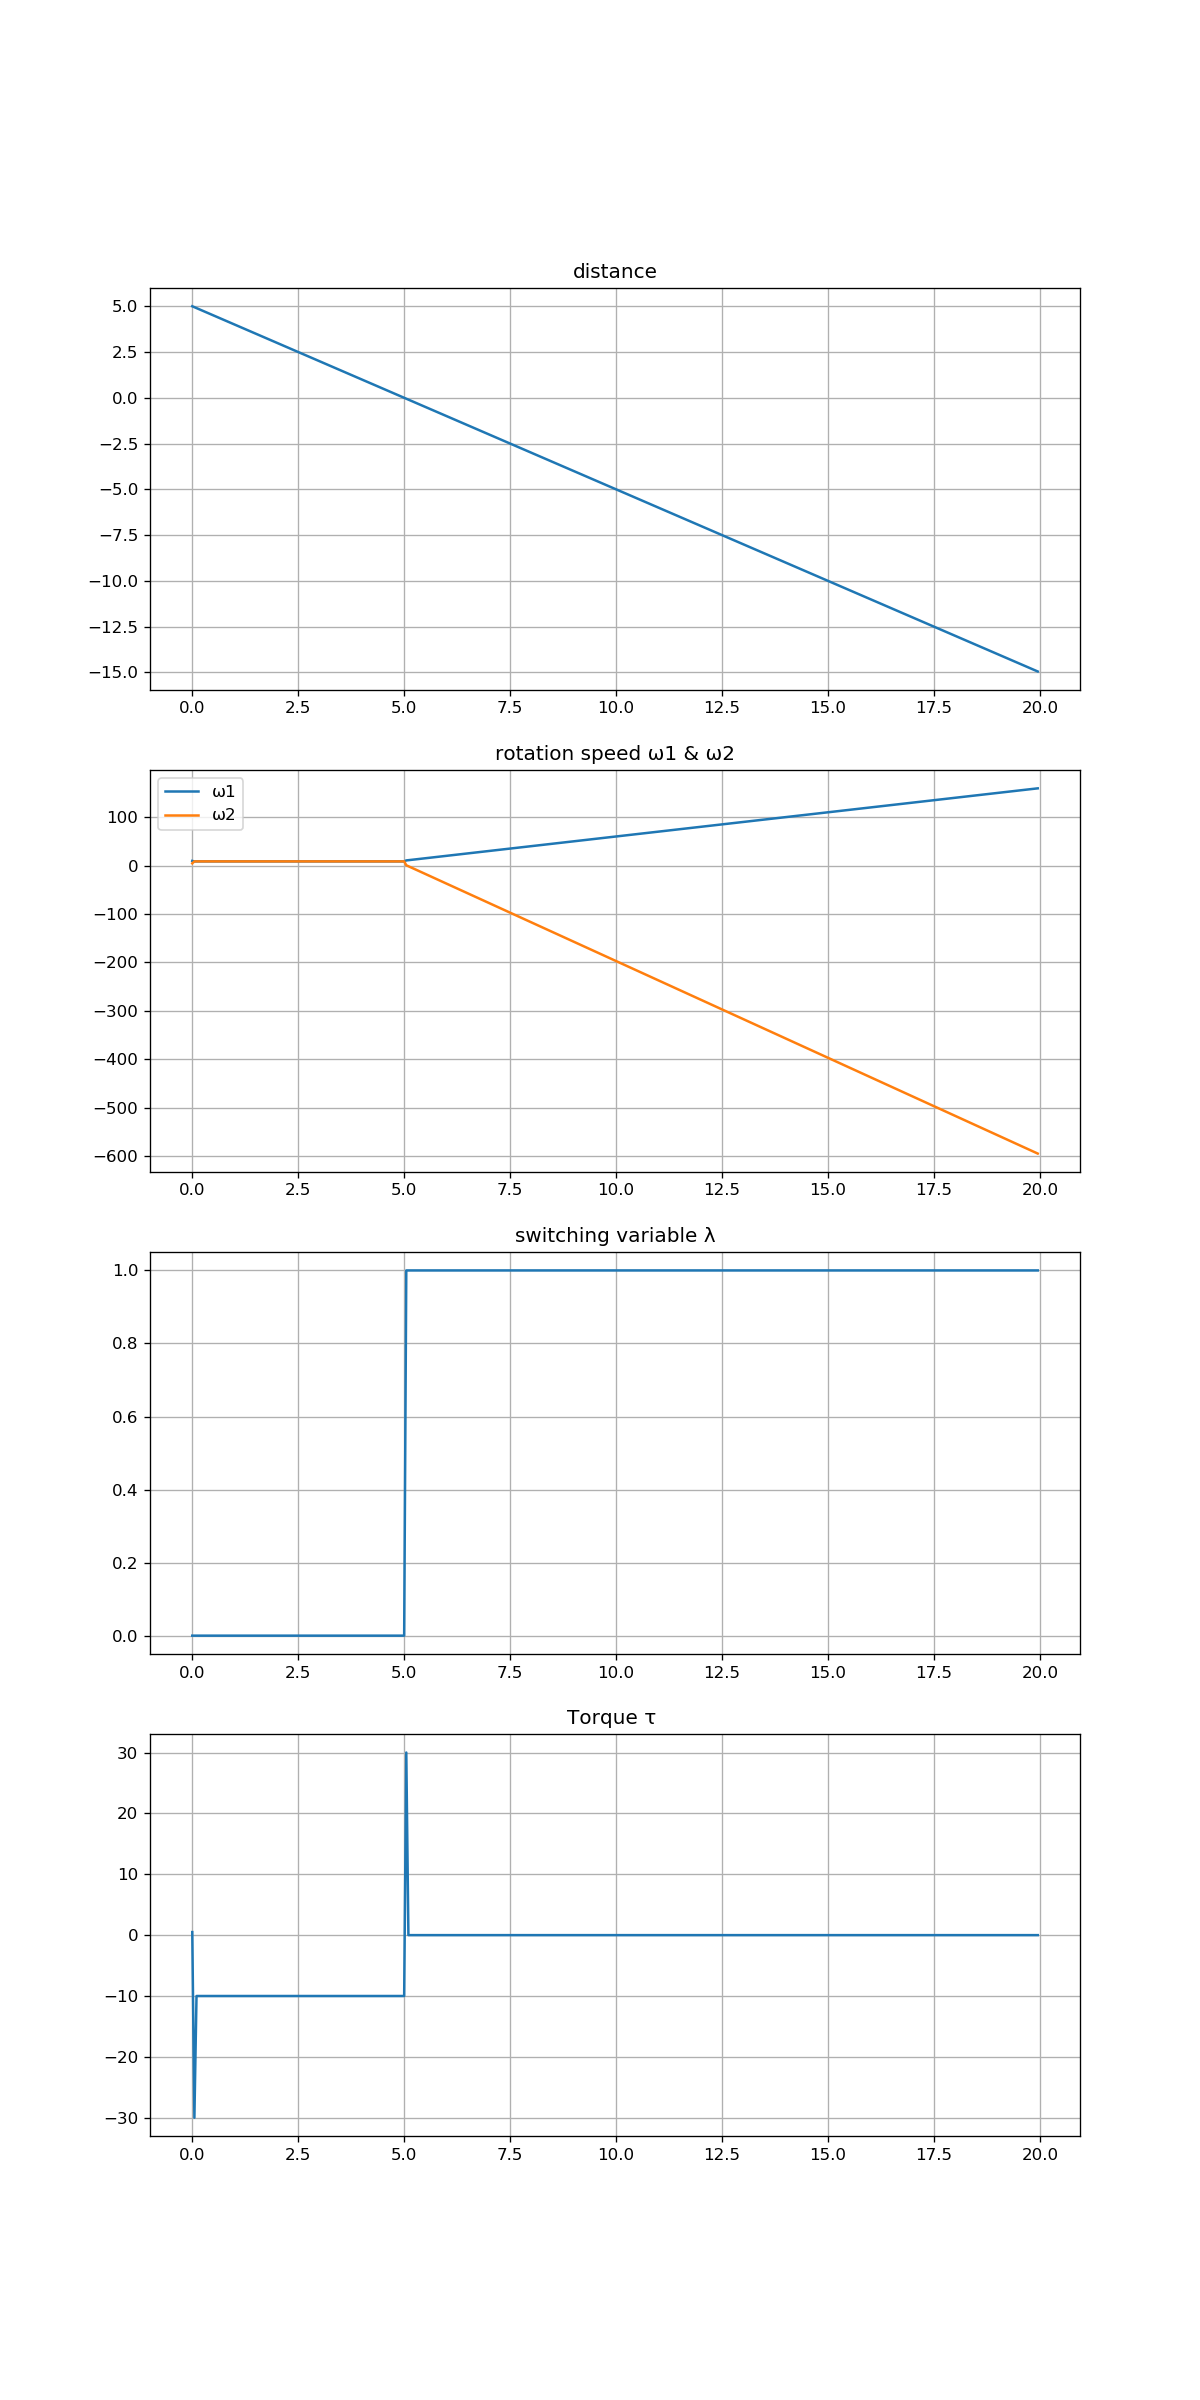

<IPython.core.display.Javascript object>


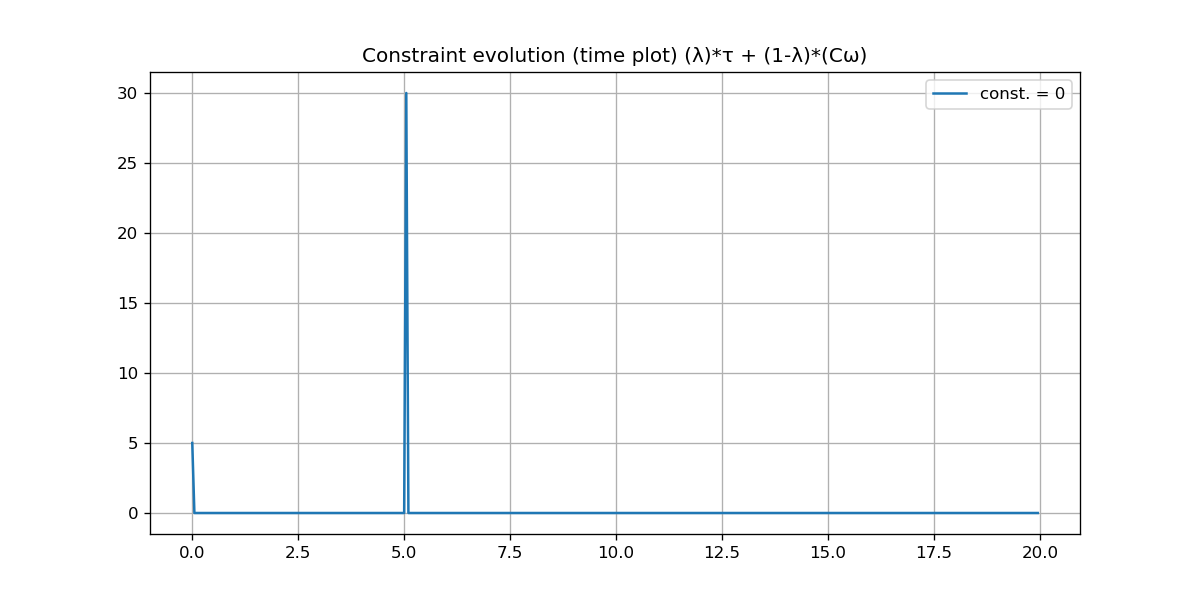

In [9]:
import scipy.linalg as linalg
import numpy as np
import siconos.kernel as sk
from numpy import eye, empty, float64, zeros, transpose, array
from siconos.kernel import FirstOrderLinearTIDS, FirstOrderType2R, FirstOrderLinearTIR, EqualityConditionNSL, RelayNSL,\
                           ComplementarityConditionNSL, NonSmoothDynamicalSystem, Interaction, \
                           EulerMoreauOSI, MoreauJeanOSI, LCP, TimeDiscretisation, TimeStepping 
import siconos.numerics as sn
#import cvxopt 
#from cvxopt import matrix

# Initial conditions
t0   = 0       # start time
t1   = 5       # switch time 
T    = 20      # end time

ω10  = 10     # initial rotation speed for disk 1 (Motor) -- free mode
ω20  = 5      # initial rotation speed for disk 2 (Clutch) --free mode

J1   = 1       # Inertia matrix disk 1
J2   = 1/4     # Inertia matrix disk 2 (smaller by half ?)

T1 = 10       # when no contact motor rpm = constant, no torque  -- free mode
T2 = -10       # when no contact small constant decrease          -- free mode

τ0   = 0.5


# right constraint
_C = [1,-1]

# "Reset direction": torque at contact
_B  = [1/J1,-1/J2]

# Constraint on torque
_D = [1]

_A = zeros((4,4));

_A[1,3] = _B[0]; _A[2,3] = _B[1];    # variable τ on ω1 and ω2               
_A[3,1] = _C[0]; _A[3,2] = _C[1]     # algebraic constraint 0 = λ(Dτ) + (1-λ)(Cω) 

print("A = ")
print(_A)

_b = [-1, T1/J1, T2/J2, 0] 
print("b = ")
print(_b)

_E = np.eye(4)
_E[3,3] = 0
print("E = ")
print(_E)

# Linear ODE system with time invariant coefficients
dyn = FirstOrderLinearTIDS([t1,ω10,ω20,τ0],_A)
dyn.setbPtr(_b)
dyn.setMPtr(_E)

clutch_DAE = NonSmoothDynamicalSystem(t0, T)
clutch_DAE.insertDynamicalSystem(dyn)

##################################################################
#     DECLARATION OF The relation and feedback in the Derivatives
#################################################################

# NonLinear-relation wich inherit FirstOrderNonLinearR
# DO NOT FORGET ComputeResiduR and Y when creating TimeStepping pb
class MyNLRelation_SwitchingDAEClutch(sk.FirstOrderNonLinearR):
    
    
    ## Constructeur __init__
    def __init__(self):
        sk.FirstOrderNonLinearR.__init__(self)
        
        return
    
    ### h related functions
    # Note that if C is fixed using self.setCPtr() then the output is considered linear
    # and the Jacobian related functions are not used anymore. Same with g.
    # (See sources of computeJach() function ) 
    def computeh(self, time, x, λ, z, y):
        y[:] = zeros(1)
        y[0] = x[0]; # λ = 0 if x<=0, 1 if x>=0
        pass

    def computeJachlambda(self, time, x, λ, z, D):
        D[:] = zeros((1,1))
        pass
        
    def computeJachx(self, time, x, λ, z, C): 
        C[:] = zeros((1,4))
        C[0,0] = 1 

        pass   
    
    ### g related functions
    def computeg(self, time, x, λ, z, r):      
        r[:] = zeros(4)
        r[3] = λ[0]*(_D[0]*x[3] - _C[0]*x[1]- _C[1]*x[2])
        pass
    
    def computeJacgx(self, time, x, λ, z, K):     
        K[:] = zeros((4,4))
        K[3,1] = -λ[0]*_C[0] 
        K[3,2] = -λ[0]*_C[1]
        K[3,3] =  λ[0]*_D[0]
        
        pass
    
    def computeJacglambda(self, time, x, λ, z, B): 
        B[:] = zeros((4,1))
        B[3,0] = (_D[0]*x[3] - _C[0]*x[1] - _C[1]*x[2]) 
        pass


### Python Non-linear Relation    
rel_python_1 = MyNLRelation_SwitchingDAEClutch() 
# Declaration that right side is an LCP
nslaw1 = sk.RelayNSL(1,0.,1.)

# Link between left hand side et right hand side of the LCP
# 0=< C1*x + D1*λ + e1 _|_ λ>= 0
interaction_1 = Interaction(nslaw1, rel_python_1)

##########################################################

clutch_DAE.link(interaction_1, dyn)

# Discretization and non-smooth problem formulation (LCP)
θ = 1.
γ = 1.
#osi = EulerMoreauOSI(θ)  # One Step time Integrator for First Order Dynamical Systems.
# Simple theta method (~backward euler)
osi = EulerMoreauOSI(θ,γ)  # One Step time Integrator for First Order Dynamical Systems.

osnspb = sk.Relay()

#osnspb.setNumericsVerboseMode(True)

# Simulation and time discretisation
time_step =  0.05
td = TimeDiscretisation(t0, time_step)
simu = TimeStepping(clutch_DAE, td, osi, osnspb)

##########################################################################
## !!! ALWAYS DECLARE COMPUTE RESIDUY and R for NonLinear Relations !!!!
##         OTHERWISE NEWTOWN ALG DO NOT USE JACOBIANS 
#########################################################################
simu.setComputeResiduY(True)
simu.setComputeResiduR(True)
simu.setNewtonMaxIteration(100)
simu.setNewtonTolerance(1e-10)
##########################################################################


##### Simulation run
x = dyn.x() # tracking state variables form ODE
λ = interaction_1.lambda_(0) # tracking λ variables form LCP
k = 0

##### Numpy array used to save data at each time step, for post-processing
N = int((T - t0) / simu.timeStep()) + 1
data_plot_2 = zeros((N, 6))

###### Initial state
data_plot_2[k, 0] = t0
data_plot_2[k, 1] = x[0] # d
data_plot_2[k, 2] = x[1] # ω1
data_plot_2[k, 3] = x[2] # ω2
data_plot_2[k, 4] = x[3] # τ
data_plot_2[k, 5] = λ[0] # λ
k += 1

while simu.hasNextEvent():
    simu.computeOneStep() # Build and solve the LCP    
#     osnspb.display()
    data_plot_2[k, 0] = simu.nextTime()
    data_plot_2[k, 1] = x[0] # d
    data_plot_2[k, 2] = x[1] # ω1
    data_plot_2[k, 3] = x[2] # ω2
    data_plot_2[k, 4] = x[3] # τ 
    data_plot_2[k, 5] = λ[0] # λ
    k += 1 
    #rel_python.display()
    simu.nextStep() # Save current state and prepare next step

#osnspb.display()
#np.linalg.eigvals(_M)

# Plotting
import ipympl
import matplotlib.pyplot as plt
%matplotlib notebook

# plt.figure(figsize=(10,5))
# plt.title('Variables (state space plot)')
# plt.plot(data_plot[0:k - 1, 2], data_plot[0:k - 1, 3],label='ω2(ω1)')
# plt.legend()
# plt.grid()
# plt.show()
# plt.figure(figsize=(10,5))
# plt.title('Variables (time plot)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 1],label='d(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 2],label='ω1(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 3],label='ω2(t)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 4],label='τ(t)')
# plt.legend()
# plt.grid()
# plt.show()

# plt.figure(figsize=(10,5))
# plt.title('λ variables (time plot)')
# plt.plot(data_plot[0:k - 1, 0], data_plot[0:k - 1, 5],label='λ')
# plt.legend()
# plt.grid()
# plt.show()

plt.figure(figsize=(10,20))
plt.subplot(411)
plt.title('distance')
plt.plot(data_plot_2[0:k - 1, 0], data_plot_2[0:k - 1, 1])
plt.grid()
plt.subplot(412)
plt.title('rotation speed ω1 & ω2')
plt.plot(data_plot_2[0:k - 1, 0], data_plot_2[0:k - 1, 2],label='ω1')
plt.plot(data_plot_2[0:k - 1, 0], data_plot_2[0:k - 1, 3],label='ω2')
plt.legend()
plt.grid()
plt.subplot(413)
plt.title('switching variable λ')
plt.plot(data_plot_2[0:k - 1, 0], data_plot_2[0:k - 1, 5])
plt.grid()
plt.subplot(414)
plt.title('Torque τ ')
plt.plot(data_plot_2[0:k - 1, 0], data_plot_2[0:k - 1, 4])
plt.grid()
plt.show()


constraint = data_plot_2[0:k - 1, 5]*(data_plot_2[0:k - 1, 4]) + (1-data_plot_2[0:k - 1, 5])*(_C[0]*data_plot_2[0:k - 1, 2]+_C[1]*data_plot_2[0:k - 1, 3])
plt.figure(figsize=(10,5))
plt.title('Constraint evolution (time plot) (λ)*τ + (1-λ)*(Cω)')
plt.plot(data_plot_2[0:k - 1, 0], constraint,label='const. = 0')
plt.legend()
plt.grid()
plt.show()



Below the plot of the graph:
$$
\left\{\begin{align}
\mathbf{y}_{k+1} &= W\lambda_{k+1} + q\\
-\mathbf{y}_{k+1} &\in N_{[0,1]}(\lambda_{k+1})
\end{align}\right.,
$$
at each time step. Unicity can be empirically checked as we have a unique intersection.

In [7]:
#%matplotlib inline
from ipywidgets import interact


h = time_step
# right constraint


def F(λ):
    _F  = np.zeros((4,4));
    #_F[1,3] = -h/J1
    #_F[2,3] = -h/J2
    #_F[3,1] = h+h*λ; _F[3,2] = -(h + h*λ); _F[3,3] = -h*λ; 
    _F[3,1] = λ; _F[3,2] = -λ; _F[3,3] = -λ; 
    return h*_F
    
def B(x):
    _B  = zeros((4,4));
    _B[3,1] = 1; _B[3,2] =-1; _B[3,3] = -1;
    return h*_B.dot(x)
        

def W(k):
    _C = zeros((1,4))
    _C[0,0] = 1; 
    xk = np.array([data_plot_2[k, 1],data_plot_2[k, 2],data_plot_2[k, 3],data_plot_2[k, 4]])
    λk = data_plot_2[k, 5]
    _M = _E - h*_A - F(λk)
    #print("##",_E-F(λk),"##")
    _W = -1*_C.dot(np.linalg.pinv(_M)).dot(B(xk))
    return _W

# def q(k):
#     xk = np.array([data_plot[k, 1],data_plot[k, 2],data_plot[k, 3],data_plot[k, 4]])
#     λk = data_plot[k, 5]
#     temp = B(xk)*λk - Resi(xk,λk)
#     -1*_C.dot(np.inv(_M)).dot(temp) + _C.dot(xk)
    

def q(k):  
    _C = zeros((1,4))
    _C[0,0] = 1; 
    λk = data_plot_2[k, 5]
    yk = _C[0,0]*data_plot_2[k, 1]
    
    return yk-W(k)*λk

#print( [q(k) for k in range(0,N)] )

# def plot_nslaw(ite):
#     plt.figure(figsize=(10,5))
#     λk = data_plot_2[ite, 5]
#     yk = -data_plot_2[ite, 1]
#     if λk!=0:
#         λ_range = np.linspace(-0.1, 1.1, 100)    
#         #y = -(yk/λk)*λ_range + yk
#         y = -W(ite)*λ_range - q(ite)
#     else:
#         y = np.linspace(-10, 10, 100)
#         λ_range = np.tile(0., 100)
        
#     plt.plot(λ_range , y,linewidth=3,color='red',label='y(λ) at step k')
#     nbpts = 20   
#     y_lower = np.linspace(-10, 0, nbpts)
#     λ_lower = np.tile(0, nbpts)
#     y_mid = np.tile(0, nbpts)
#     λ_mid = np.linspace(0, 1, nbpts)
#     y_high = np.linspace(0, 10, nbpts)
#     λ_high = np.tile(1., nbpts)
    
#     plt.plot(λ_high , y_high,linewidth=3,color='blue')
#     plt.plot(λ_mid,y_mid,'b',linewidth=3,color='blue')
#     plt.plot(λ_lower,y_lower,'b',linewidth=3,color='blue',label='Normal cone')
    
#     plt.xlabel("λ")
#     plt.ylabel("y")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.grid(True)
#     plt.show()
    
# interact(plot_nslaw,ite=(0,N-1))




<IPython.core.display.Javascript object>


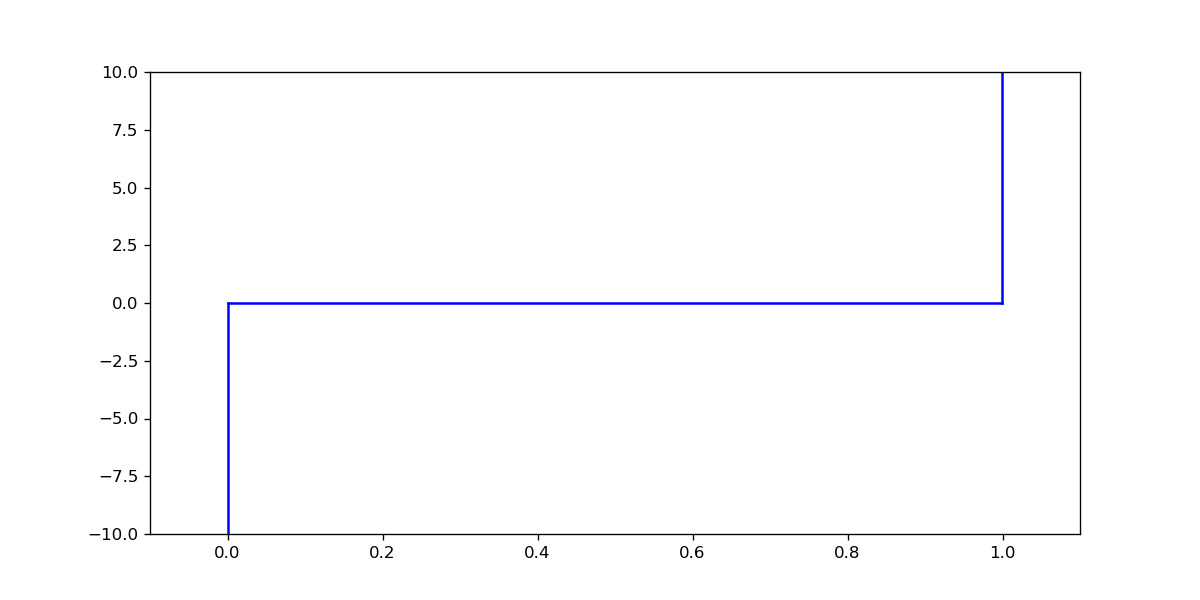

In [8]:
###############################################################
%matplotlib notebook
import matplotlib.animation as animation
W(5)
fig = plt.figure(figsize=(10,5))

ax = plt.axes(xlim=(-0.1, 1.1), ylim=(-10, 10))

Nlines = 4
lines = [plt.plot([], [])[0] for _ in range(Nlines)] #lines to animate

patches = lines

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    return patches #return everything that must be updated

def animate(i):
    
    λk = data_plot_2[i, 5]
    yk = -data_plot_2[i, 1]
    
#     if λk!=0:
#         λ_range = np.linspace(-0.1, 1.1, 100)    
#         #y = -(yk/λk)*λ_range + yk
#         y = -W(i)*λ_range - q(i)
#     else:
#         y = np.linspace(-10, 10, 100)
#         λ_range = np.tile(0., 100)

    λ_range = np.linspace(-0.1, 1.1, 100)    
    y = -W(i)*λ_range - q(i)
        
    nbpts = 20   
    y_lower = np.linspace(-10, 0, nbpts)
    λ_lower = np.tile(0, nbpts)
    y_mid = np.tile(0, nbpts)
    λ_mid = np.linspace(0, 1, nbpts)
    y_high = np.linspace(0, 10, nbpts)
    λ_high = np.tile(1., nbpts)
    
    #animate lines
    for j,line in enumerate(lines):
        if j==0 :
            line.set_data(λ_lower, y_lower)
            line.set_color('blue')
        if j==1 :
            line.set_data(λ_mid, y_mid)
            line.set_color('blue')
        if j==2 :
            line.set_data(λ_high, y_high)
            line.set_color('blue')
        if j==3 :
            line.set_data(λ_range, y)
            line.set_color('red')

    return patches #return everything that must be updated


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N-1, interval=15, blit=True, repeat=True)

plt.show()
